<span style="color:#e02860">
<span style="font-size:22px;">

#### OLA RIDES DATASET

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The rides dataset contains 50,000 ride records with details such as ride IDs, dates and times, service types (cab or auto), source and destination locations, ride durations, distances, fare details, payment methods, and ride statuses. Additional fields include ride charges, miscellaneous charges, and total fares. It provides information about how passengers travel between different locations using various transport services. This dataset can be used to analyze ride patterns, study fare variations, identify factors influencing cancellations or delays, and evaluate customer payment preferences. In this dataset, I am going to clean and analyze the data to understand travel trends, explore cost patterns, and find insights to improve ride service performance.

## Introduction:

#### Import the necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset

In [ ]:
df=pd.read_csv("rides_data.csv")

#### Display few rows of dataset

In [3]:
df.head()

,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40.542646,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51.542646,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
2,auto,2024-07-23,11:05:37.542646,cancelled,Babusapalya Cove,Kothaguda Terrace,25,RD9376481122237926,20.24,NaN,NaN,NaN,NaN
3,cab economy,2024-06-24,08:45:10.542646,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44.542646,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay


#### Data Cleaning

In [4]:
#-----Check whether any null values-----
df.isnull().sum()

services             0
date                 0
time                 0
ride_status          0
source               0
destination          0
duration             0
ride_id              0
distance             0
ride_charge       5036
misc_charge       5036
total_fare        5036
payment_method    5036
dtype: int64

#### Dropping null values in payment_method

In [5]:
df = df.dropna(subset=['payment_method'])

In [6]:
#-----Check whether any null values-----
df.isnull().sum()

services          0
date              0
time              0
ride_status       0
source            0
destination       0
duration          0
ride_id           0
distance          0
ride_charge       0
misc_charge       0
total_fare        0
payment_method    0
dtype: int64

In [7]:
#-----Check duplicates---------
df.duplicated().sum()

np.int64(0)

#### Check the datatype of columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44964 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   services        44964 non-null  object 
 1   date            44964 non-null  object 
 2   time            44964 non-null  object 
 3   ride_status     44964 non-null  object 
 4   source          44964 non-null  object 
 5   destination     44964 non-null  object 
 6   duration        44964 non-null  int64  
 7   ride_id         44964 non-null  object 
 8   distance        44964 non-null  float64
 9   ride_charge     44964 non-null  float64
 10  misc_charge     44964 non-null  float64
 11  total_fare      44964 non-null  float64
 12  payment_method  44964 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 4.8+ MB


In [ ]:
#-------Changing datatype of date column------
df['date']=pd.to_datetime(df['date'])

#-------Changing datatype of time column------
df['time']=pd.to_datetime(df['time'])
df['time']=df['time'].dt.floor('S')      #---------Removing seconds from time------------------
df['time']=df['time'].dt.time
df.head()
# pylint: disable=warning-name

C:\Users\anusr\AppData\Local\Temp\ipykernel_38452\1739038104.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time']=pd.to_datetime(df['time'])
C:\Users\anusr\AppData\Local\Temp\ipykernel_38452\1739038104.py:6: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['time']=df['time'].dt.floor('S')      #---------Removing seconds from time------------------


,services,date,time,ride_status,source,destination,duration,ride_id,distance,ride_charge,misc_charge,total_fare,payment_method
0,cab economy,2024-07-15,08:30:40,completed,Balagere Harbor,Harohalli Nagar,39,RD3161218751875354,27.21,764.83,31.51,796.34,Amazon Pay
1,auto,2024-07-05,23:36:51,completed,Basavanagudi 3rd Block,Bikasipura 1st Stage,89,RD8171514284594096,34.03,314.83,49.52,364.35,Paytm
3,cab economy,2024-06-24,08:45:10,completed,Mahadevapura Mews,Kanakapura Arc,89,RD3676889143182765,31.17,484.73,15.84,500.57,QR scan
4,cab economy,2024-07-15,00:26:44,completed,Ganganagar Cove,Basaveshwaranagar Colony,95,RD6639410275948084,27.21,663.50,14.13,677.63,Amazon Pay
5,auto,2024-07-02,01:28:29,completed,HSR Layout Area,JP Nagar Viewpoint,18,RD5922205486441934,33.69,456.73,25.19,481.92,QR scan


#### Checking any negative values in the dataset

In [10]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=["number"])

# Count negative values per column
negative_counts = (numeric_data <  0).sum()

# Total negatives in dataset
total_negatives = negative_counts.sum()

print("Negative values per column:\n", negative_counts)
print("\nTotal negative values in dataset:", total_negatives)

Negative values per column:
 duration       0
distance       0
ride_charge    0
misc_charge    0
total_fare     0
dtype: int64

Total negative values in dataset: 0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44964 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   services        44964 non-null  object        
 1   date            44964 non-null  datetime64[ns]
 2   time            44964 non-null  object        
 3   ride_status     44964 non-null  object        
 4   source          44964 non-null  object        
 5   destination     44964 non-null  object        
 6   duration        44964 non-null  int64         
 7   ride_id         44964 non-null  object        
 8   distance        44964 non-null  float64       
 9   ride_charge     44964 non-null  float64       
 10  misc_charge     44964 non-null  float64       
 11  total_fare      44964 non-null  float64       
 12  payment_method  44964 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 4.8+ MB


<span style="color:#de4710">
<span style="font-size:26px;">
What are the services provided by Ola?

In [12]:
data=df['services'].unique()
uni_df=pd.DataFrame(data,columns=['services'])
uni_df

,services
0,cab economy
1,auto
2,parcel
3,bike lite
4,bike


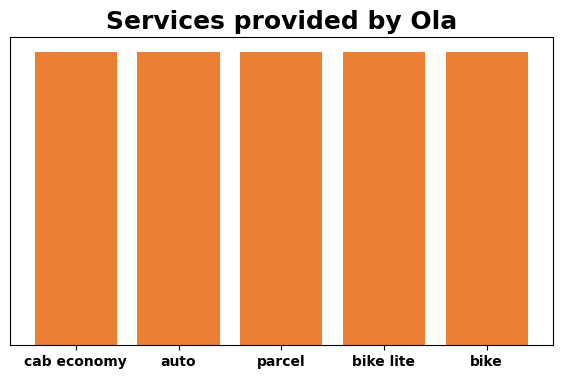

In [13]:
plt.figure(figsize=(7,4))
plt.bar(uni_df['services'], [1]*len(uni_df), color='#eb8034')  # all bars same height
plt.xticks(rotation=0,fontweight='bold')
plt.yticks([])  # remove y-axis
plt.title("Services provided by Ola",fontsize=18,fontweight='bold')
plt.show()

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The dataset has five types of services: cab economy, auto, parcel, bike lite, and bike.
These services cover both passenger travel and goods delivery.

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
It shows the company is offering different options to reach more customers.

<span style="color:#de4710">
<span style="font-size:26px;">
What is the popular service among customers?

In [14]:
pop_ser=df['services'].value_counts().sort_values()
pop_ser

services
bike lite       4388
parcel          6747
cab economy     9148
auto           11114
bike           13567
Name: count, dtype: int64

C:\Users\anusr\AppData\Local\Temp\ipykernel_24468\172529905.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='services',data=df,order=pop_ser.index,palette='Spectral')


<Axes: title={'center': 'Popular Services by Ola'}, xlabel='Services', ylabel='Number of Services'>

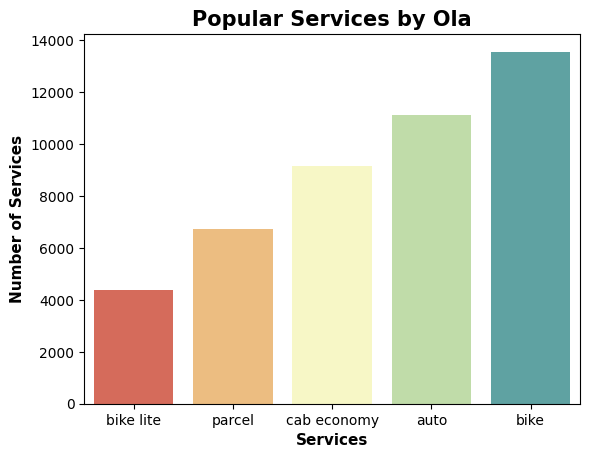

In [15]:
plt.xlabel('Services',fontweight='bold',fontsize=11)
plt.ylabel('Number of Services',fontweight='bold',fontsize=11)
plt.title('Popular Services by Ola',fontweight='bold',fontsize=15)
sns.countplot(x='services',data=df,order=pop_ser.index,palette='Spectral')

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The data shows that Bike is the most popular service with 13,567 bookings, indicating very high customer demand. Auto (11,114) and Cab economy (9,148) are also widely used, showing strong preference for affordable ride options. Parcel (6,747) and Bike lite (4,388) are less used, meaning they have lower customer adoption compared to passenger rides.</p>

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The main reason is that Bike rides are cheaper, faster, and easier to use in traffic, which makes them very popular in cities. Auto and cab economy are also in demand because they can carry more people and provide comfort at an affordable price. Parcel and bike lite have lower usage because they are used only for specific or limited needs like deliveries or single short rides, which are less frequent compared to daily passenger travel.</p>

<span style="color:#de4710">
<span style="font-size:26px;">
Which are the top 5 busiest destinations?

In [16]:
bus_dest=df['destination'].value_counts().head(5)
print(bus_dest)

destination
Gottigere Landing    21
Gottigere Square     18
HRBR Layout Drive    17
Kudlu Square         15
Hulimavu Drive       15
Name: count, dtype: int64


C:\Users\anusr\AppData\Local\Temp\ipykernel_24468\2718324273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bus_dest.index,y=bus_dest.values,palette='plasma')


<Axes: title={'center': 'Busiest Destintions in Bengaluru'}, xlabel='Destination'>

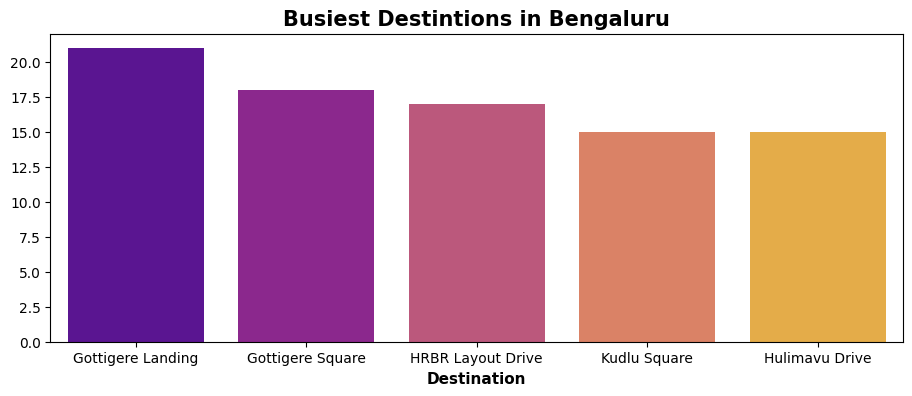

In [17]:
plt.figure(figsize=(11,4))
plt.xlabel('Destination',fontweight='bold',fontsize=11)
plt.title('Busiest Destintions in Bengaluru',fontweight='bold',fontsize=15)
sns.barplot(x=bus_dest.index,y=bus_dest.values,palette='plasma')

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The data shows that Gottigere Landing is the most common destination with 21 trips, followed closely by Gottigere Square (18). HRBR Layout Drive is the third most visited with 17 trips. Kudlu Square and Hulimavu Drive have equal trips (15 each), showing balanced demand for these destinations. Overall, travel demand is concentrated in a few key areas, with Gottigere being the most popular.</p>

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The reason could be that these destinations are key residential or commercial hubs, so more people travel there regularly. Gottigere appears most often likely because it has better connectivity, workplaces, or shopping areas attracting higher traffic. Places like Kudlu Square and Hulimavu Drive may have slightly lower counts because they serve localized or smaller populations compared to Gottigere.</p>

<span style="color:#de4710">
<span style="font-size:26px;">
What is average duration across different services?

In [18]:
avg_dur=df.groupby('services')['duration'].mean().sort_values().reset_index()
avg_dur

,services,duration
0,bike lite,63.972425
1,bike,64.036338
2,cab economy,64.183537
3,parcel,64.417519
4,auto,65.043639


C:\Users\anusr\AppData\Local\Temp\ipykernel_24468\1882124411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_dur,x='services',y='duration',palette="YlOrBr")


<Axes: title={'center': 'Average duration across different services'}, xlabel='Services', ylabel='Duration'>

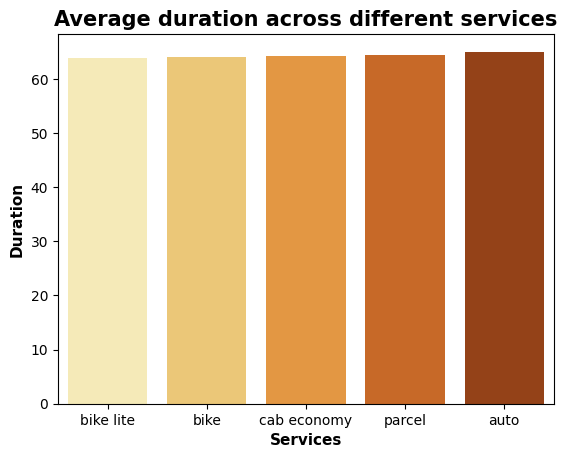

In [19]:
plt.xlabel("Services",fontweight='bold',fontsize=11)
plt.ylabel("Duration",fontweight='bold',fontsize=11)
plt.title("Average duration across different services",fontweight='bold',fontsize=15)
sns.barplot(data=avg_dur,x='services',y='duration',palette="YlOrBr")

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The data shows that Bike lite and Bike have the shortest average trip durations (around 64 minutes), while Auto has the longest (65 minutes). Cab economy and Parcel fall in between. Overall, passenger bike services are slightly faster than other services, while auto rides take a bit more time.</p>

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The reason is that bike services can move through traffic easily, allowing them to navigate traffic faster. Auto and cab economy take slightly longer because they carry more passengers and may face more traffic delays. Parcel deliveries also take extra time due to stops for pickups or drop-offs.</p>

<span style="color:#de4710">
<span style="font-size:26px;">
Which days of the week have  highest number of rides?

In [20]:
week_high=df['date'].dt.day_name().value_counts().sort_values()
week_high

date
Saturday     5913
Sunday       5916
Wednesday    6575
Friday       6585
Thursday     6637
Tuesday      6659
Monday       6679
Name: count, dtype: int64

C:\Users\anusr\AppData\Local\Temp\ipykernel_24468\403248424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=week_high.index,y=week_high.values,palette="ch:start=.2,rot=-.3")


<Axes: title={'center': 'No.of Rides per Day'}, xlabel='Days', ylabel='No.of Rides'>

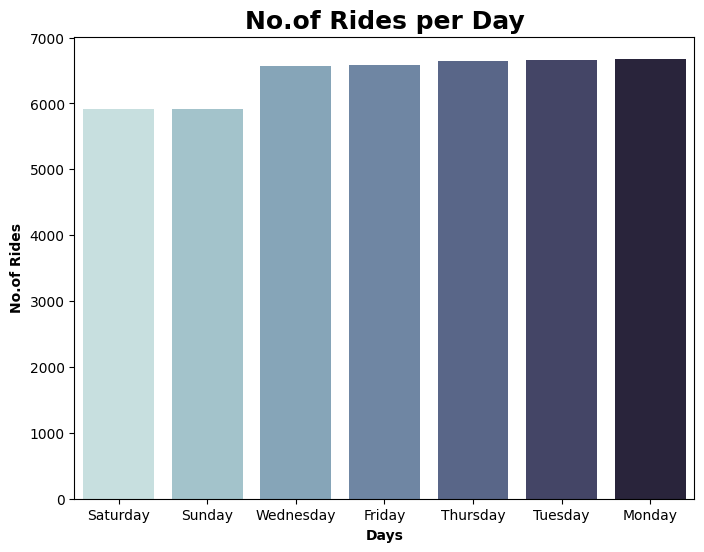

In [21]:
plt.figure(figsize=(8,6))
plt.xlabel('Days',fontweight='bold')
plt.ylabel('No.of Rides',fontweight='bold')
plt.title('No.of Rides per Day',fontweight='bold',fontsize=18)
sns.barplot(x=week_high.index,y=week_high.values,palette="ch:start=.2,rot=-.3")

<span style="color:#ed7c2b">
<span style="font-size:22px;">
<p style="text-align:justify;">
From this data, we can see that Monday has the highest number of bookings (6,679), while Saturday has the lowest (5,913). Overall, weekdays (Monday to Friday) have slightly higher bookings compared to weekends (Saturday and Sunday).</p>

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The reason is that people travel more on weekdays for work, school, or regular activities, which increases bookings from Monday to Friday. On weekends (Saturday and Sunday), travel is slightly lower because fewer people commute regularly, leading to fewer bookings.</p>

<span style="color:#de4710">
<span style="font-size:26px;">
Which month has highest number of rides?

In [22]:
mon_ride=df['date'].dt.month_name().value_counts()
#mycolors=['#732014','#0c690c','#d4cb1e']
mycolors=['gold', 'lightcoral','lightskyblue']
mon_ride

date
July      22912
August    11918
June      10134
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x16050ad9c00>,
 [Text(-1.099503594540178, -0.03304308692038148, 'July'),
  Text(0.8567051827462869, -0.6899682817750765, 'August'),
  Text(0.715391816300993, 0.8355923343171396, 'June')],
 [Text(-0.5997292333855516, -0.018023501956571715, '51.0%'),
  Text(0.46729373604342916, -0.3763463355136781, '26.5%'),
  Text(0.39021371798235976, 0.4557776369002579, '22.5%')])

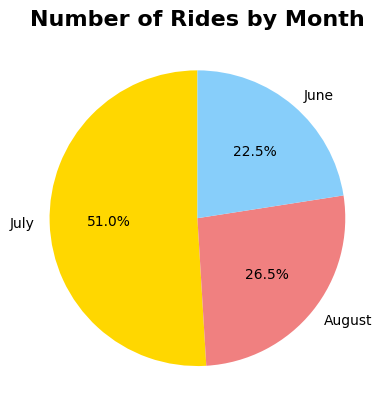

In [24]:
plt.title("Number of Rides by Month",fontweight='bold',fontsize=16)
plt.pie(mon_ride.values,labels=mon_ride.index,startangle=90,colors=mycolors,autopct='%1.1f%%')

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The data shows that July recorded the highest number of rides (22,912), followed by August (11,918) and June (10,134).</p>

<span style="color:#ed7c2b">
<span style="font-size:22px;">
<p style="text-align:justify;">
The likely reason for this trend is seasonality—July often coincides with school/college vacations, holidays, and favorable weather, which increases travel and commuting. August shows slightly lower rides, possibly as vacations end and routines stabilize. June has the least because it is a transition month when schools or work schedules are still ongoing, leading to comparatively lower ride demand.</p>

<span style="color:#de4710">
<span style="font-size:26px;">
Which service generates the highest revenue overall?

In [25]:
serv_rev=df.groupby('services')['total_fare'].sum().sort_values(ascending=False)
serv_rev

services
bike           7432783.95
auto           6099731.32
cab economy    5006233.04
parcel         3686514.15
bike lite      2387720.59
Name: total_fare, dtype: float64

C:\Users\anusr\AppData\Local\Temp\ipykernel_24468\3545332435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=serv_rev.index,y=serv_rev.values,palette='twilight')


<Axes: title={'center': 'Total Revenue of different services'}, xlabel='Services', ylabel='Revenue'>

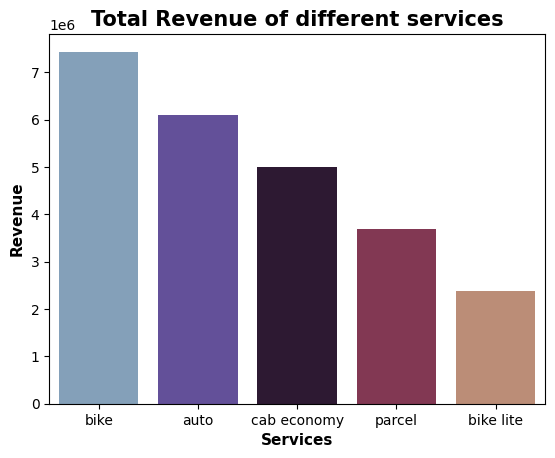

In [26]:
plt.xlabel("Services",fontweight='bold',fontsize=11)
plt.ylabel("Revenue",fontweight='bold',fontsize=11)
plt.title("Total Revenue of different services",fontweight='bold',fontsize=15)
sns.barplot(x=serv_rev.index,y=serv_rev.values,palette='twilight')

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The analysis shows that bike services generate the highest overall revenue, contributing significantly more than other categories. Auto and cab economy follow closely, indicating that these are also popular and revenue-driving options. Parcel and bike lite services contribute the least, suggesting lower demand or smaller fare values compared to other services.</p>

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The main reason is that bike services are often cheaper, faster, and more convenient for short-distance trips, which leads to a higher volume of rides and thus more total revenue. Auto and cab economy have steady demand but may face higher competition and longer trip times. Parcel and bike lite generate less revenue because they serve only specific needs with lower ride frequency compared to passenger-focused services.</p>

<span style="color:#de4710">
<span style="font-size:26px;">
Which is the most common payment method?

In [27]:
com_pay=df['payment_method'].value_counts()
com_pay

payment_method
Paytm         11315
GPay          11268
Amazon Pay    11225
QR scan       11156
Name: count, dtype: int64

C:\Users\anusr\AppData\Local\Temp\ipykernel_24468\776600712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_method',data=df,order=com_pay.index,palette='OrRd')


<Axes: title={'center': 'Total Revenue of different services'}, xlabel='Payment Method', ylabel='Count'>

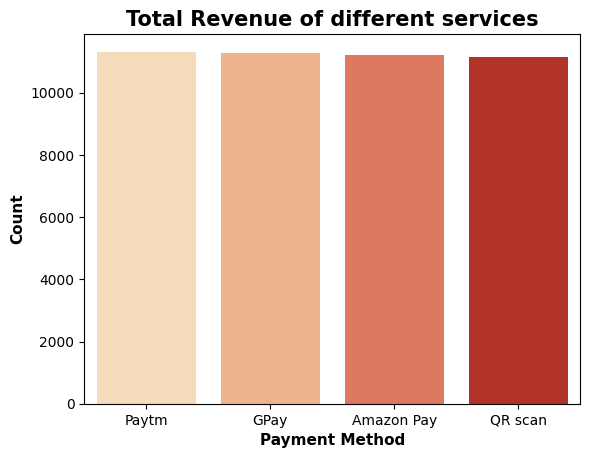

In [28]:
plt.xlabel("Payment Method",fontweight='bold',fontsize=11)
plt.ylabel("Count",fontweight='bold',fontsize=11)
plt.title("Total Revenue of different services",fontweight='bold',fontsize=15)
sns.countplot(x='payment_method',data=df,order=com_pay.index,palette='OrRd')

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The analysis shows that Paytm is the most frequently used payment method, but only by a small margin compared to GPay and Amazon Pay. All four methods are almost equally popular, suggesting customers have diverse preferences in digital payments.</p>

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The reason is that most customers prefer digital payments for convenience and speed, and multiple options like Paytm, GPay, Amazon Pay, and QR scan are widely available and accepted. Since all these platforms offer similar ease of use and reliability, users are spread fairly evenly across them, rather than favoring just one.</p>

<span style="color:#de4710">
<span style="font-size:26px;">
what is the total revenue per month?

In [29]:
df['month']=df['date'].dt.month_name()
df.head()
mon_rev=df.groupby('month')['total_fare'].sum().sort_values().reset_index()
mon_rev

,month,total_fare
0,June,5548695.60
1,August,6547531.65
2,July,12516755.80


C:\Users\anusr\AppData\Local\Temp\ipykernel_24468\2376730494.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mon_rev,x='month',y='total_fare',palette='viridis')


<Axes: title={'center': 'Total Revenue per Month'}, xlabel='Month', ylabel='Revenue'>

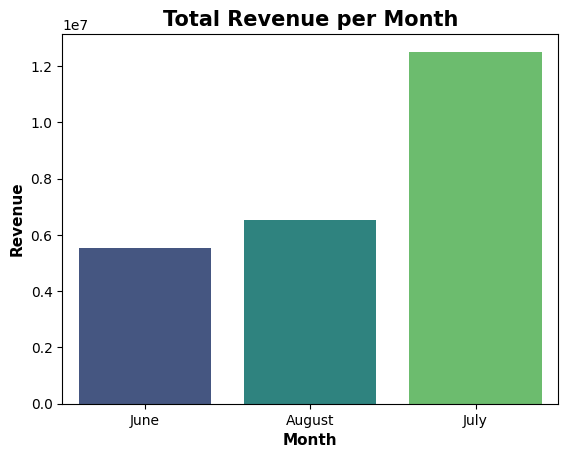

In [30]:
plt.xlabel("Month",fontweight='bold',fontsize=11)
plt.ylabel("Revenue",fontweight='bold',fontsize=11)
plt.title("Total Revenue per Month",fontweight='bold',fontsize=15)
sns.barplot(data=mon_rev,x='month',y='total_fare',palette='viridis')

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The data shows significant monthly variation in total fares, with July generating the highest revenue at 12,516,755.80, August at a moderate 6,547,531.65, and June the lowest at 5,548,695.60.</p>

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The reason for this variation is likely seasonal demand fluctuations—July may have higher ride activity due to holidays, events, or favorable weather, while June and August experience lower demand, leading to reduced total fares.</p>

<span style="color:#de4710">
<span style="font-size:26px;">
What is the average fare per ride across different service types (auto, cab economy, cab premium)?

In [31]:
avg_fare=df.groupby('services')['total_fare'].mean().sort_values().reset_index()
avg_fare

,services,total_fare
0,bike lite,544.147810
1,parcel,546.393086
2,cab economy,547.248911
3,bike,547.857592
4,auto,548.833122


C:\Users\anusr\AppData\Local\Temp\ipykernel_24468\3854246877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_fare,x='services',y='total_fare',palette='crest')


<Axes: title={'center': 'Average fare across Services'}, xlabel='Services', ylabel='Total fare'>

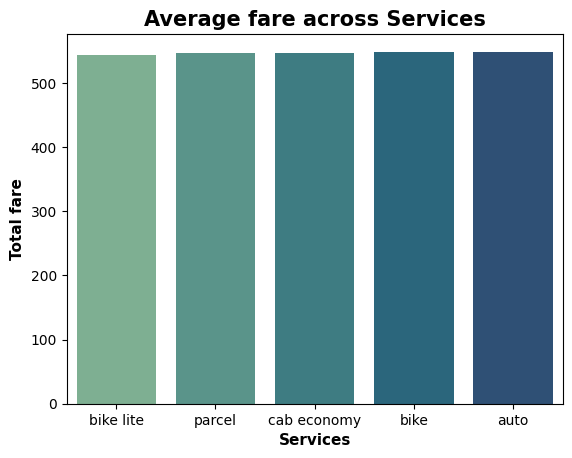

In [32]:
plt.xlabel("Services",fontweight='bold',fontsize=11)
plt.ylabel("Total fare",fontweight='bold',fontsize=11)
plt.title("Average fare across Services",fontweight='bold',fontsize=15)
sns.barplot(data=avg_fare,x='services',y='total_fare',palette='crest')

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The average fares for different services are very similar, ranging from 544.15 to 548.83, showing minimal variation in revenue per service type. Auto services generate the highest fare, while bike lite generates the lowest, though the difference is small. Overall, all services contribute almost equally to revenue, suggesting focus can be on efficiency or customer preference rather than fare differences.</p>

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The reason could be that the trip distances or durations are similar across different services, so the total fare collected from each service type stays almost equal.</p>

<span style="color:#de4710">
<span style="font-size:26px;">
What is the average distance across different services?

In [33]:
avg_dis=df.groupby('services')['distance'].mean().sort_values().reset_index()
avg_dis

,services,distance
0,bike,25.353878
1,cab economy,25.498173
2,auto,25.531252
3,bike lite,25.646167
4,parcel,25.649846


C:\Users\anusr\AppData\Local\Temp\ipykernel_24468\1908005274.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_dis,x='services',y='distance',palette='Paired')


<Axes: title={'center': 'Average distancere across Services'}, xlabel='Services', ylabel='Distance'>

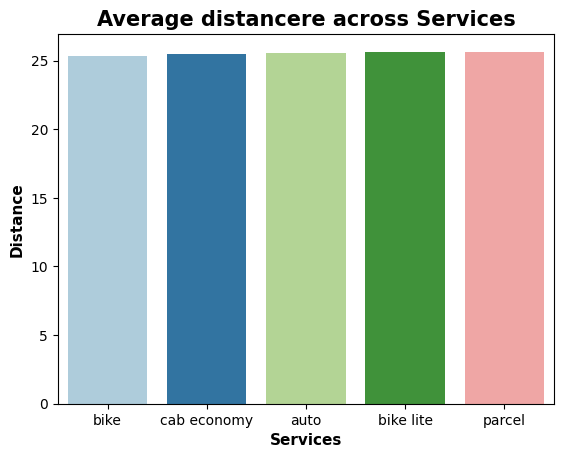

In [34]:
plt.xlabel("Services",fontweight='bold',fontsize=11)
plt.ylabel("Distance",fontweight='bold',fontsize=11)
plt.title("Average distancere across Services",fontweight='bold',fontsize=15)
sns.barplot(data=avg_dis,x='services',y='distance',palette='Paired')

<p style="text-align:justify;">
<span style="color:#ed7c2b">
<span style="font-size:22px;">
The average distances traveled by different services are very similar, ranging from 25.35 to 25.65 km, showing minimal variation across service types. Parcel and bike lite services cover slightly longer distances, while bike covers the shortest, though the differences are small. This indicates that all services operate over nearly the same trip lengths, suggesting consistent service areas or routing patterns. Overall, distance does not appear to be a major differentiator among the services.</p>

<p style="text-align:justify;">
<span style="color:#cfad34">
<span style="font-size:26px;">
SUMMARY:

<p style="text-align:justify;">
<span style="color:#e65245">
<span style="font-size:22px;">
The dataset shows that the company offers five services—Bike, Auto, Cab Economy, Parcel, and Bike Lite—covering both passenger travel and goods delivery. Bike is the most popular service with the highest number of bookings, followed by Auto and Cab Economy, while Parcel and Bike Lite have lower usage. Bike rides are faster and more convenient in traffic, making them highly preferred by customers, whereas Auto and Cab Economy are chosen for comfort and slightly longer trips. Parcel and Bike Lite have limited usage because they serve specific needs like deliveries or short rides. Travel demand is concentrated in key areas, with Gottigere Landing and Gottigere Square being the most visited destinations. Average trip distances are similar across services, ranging from 25.35 to 25.65 km, and average fares are also nearly equal, indicating minimal revenue variation per service type. Weekdays, especially Monday, have higher bookings compared to weekends, and July records the highest number of rides due to seasonal factors like holidays and favorable weather. Bike services generate the highest overall revenue, followed by Auto and Cab Economy, while Parcel and Bike Lite contribute the least. Digital payments are widely used, with Paytm, GPay, Amazon Pay, and QR scan almost equally popular among customers. Overall, the data indicates that passenger-focused services drive the majority of demand and revenue, travel patterns are concentrated in specific locations and times, and bikes offer the fastest and most convenient option for urban travel.</p>